In [7]:
import os
import urllib.request
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates


In [8]:
import arabic_reshaper
from bidi.algorithm import get_display

def ar(text):
    return get_display(arabic_reshaper.reshape(text))


In [9]:
url = "https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes18/l2/data/xrsf-l2-avg1m_science/2025/05/sci_xrsf-l2-avg1m_g18_d20250514_v2-2-1.nc"

filename = "sci_xrsf-l2-avg1m_g18_d20250514.nc"

if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)
    print("File downloaded successfully.")
else:
    print("File already exists.")


File already exists.


In [10]:
ds = xr.open_dataset(filename)
ds


<xarray.Dataset> Size: 271kB
Dimensions:                   (time: 1440, quad_diode: 4)
Coordinates:
  * time                      (time) datetime64[ns] 12kB 2025-05-14 ... 2025-...
Dimensions without coordinates: quad_diode
Data variables: (12/42)
    xrsa_flux                 (time) float32 6kB ...
    xrsa_flux_observed        (time) float32 6kB ...
    xrsa_flux_electrons       (time) float32 6kB ...
    xrsb_flux                 (time) float32 6kB ...
    xrsb_flux_observed        (time) float32 6kB ...
    xrsb_flux_electrons       (time) float32 6kB ...
    ...                        ...
    xrsa1_flag_excluded       (time) float32 6kB ...
    xrsa2_flag_excluded       (time) float32 6kB ...
    xrsb1_flag_excluded       (time) float32 6kB ...
    xrsb2_flag_excluded       (time) float32 6kB ...
    yaw_flip_flag             (time) float32 6kB ...
    electron_correction_flag  (time) float32 6kB ...
Attributes: (12/48)
    Conventions:                   ACDD-1.3, Spase v2.2.6
    title:                         L2 XRS 1 minute average
    summary:                       The EXIS X-Ray Sensor (XRS) measures in a ...
    keywords:                      NumericalData.MeasurementType.Irradiance
    keywords_vocabulary:           SPASE: Space Physics Archive Search and Ex...
    naming_authority:              gov.nesdis.noaa
    ...                            ...
    input_system_environments:     sci
    input_files_first:             sci_mpsh-l2-avg1m_g18_d20250513_v2-0-3.nc,...
    input_files_last:              sci_mpsh-l2-avg1m_g18_d20250515_v2-0-3.nc,...
    input_files_total:             6
    git_commit_hash:               61741bab5c1d390738ae50a0c36781d22535d401
    git_commit_date:               2026-01-15T21:52:02

In [11]:
time = ds["time"].values

# GOES XRS channels
flux_short = ds["xrsb_flux"].values  # 0.5–4 Å (short)
flux_long  = ds["xrsa_flux"].values  # 1–8 Å (long)


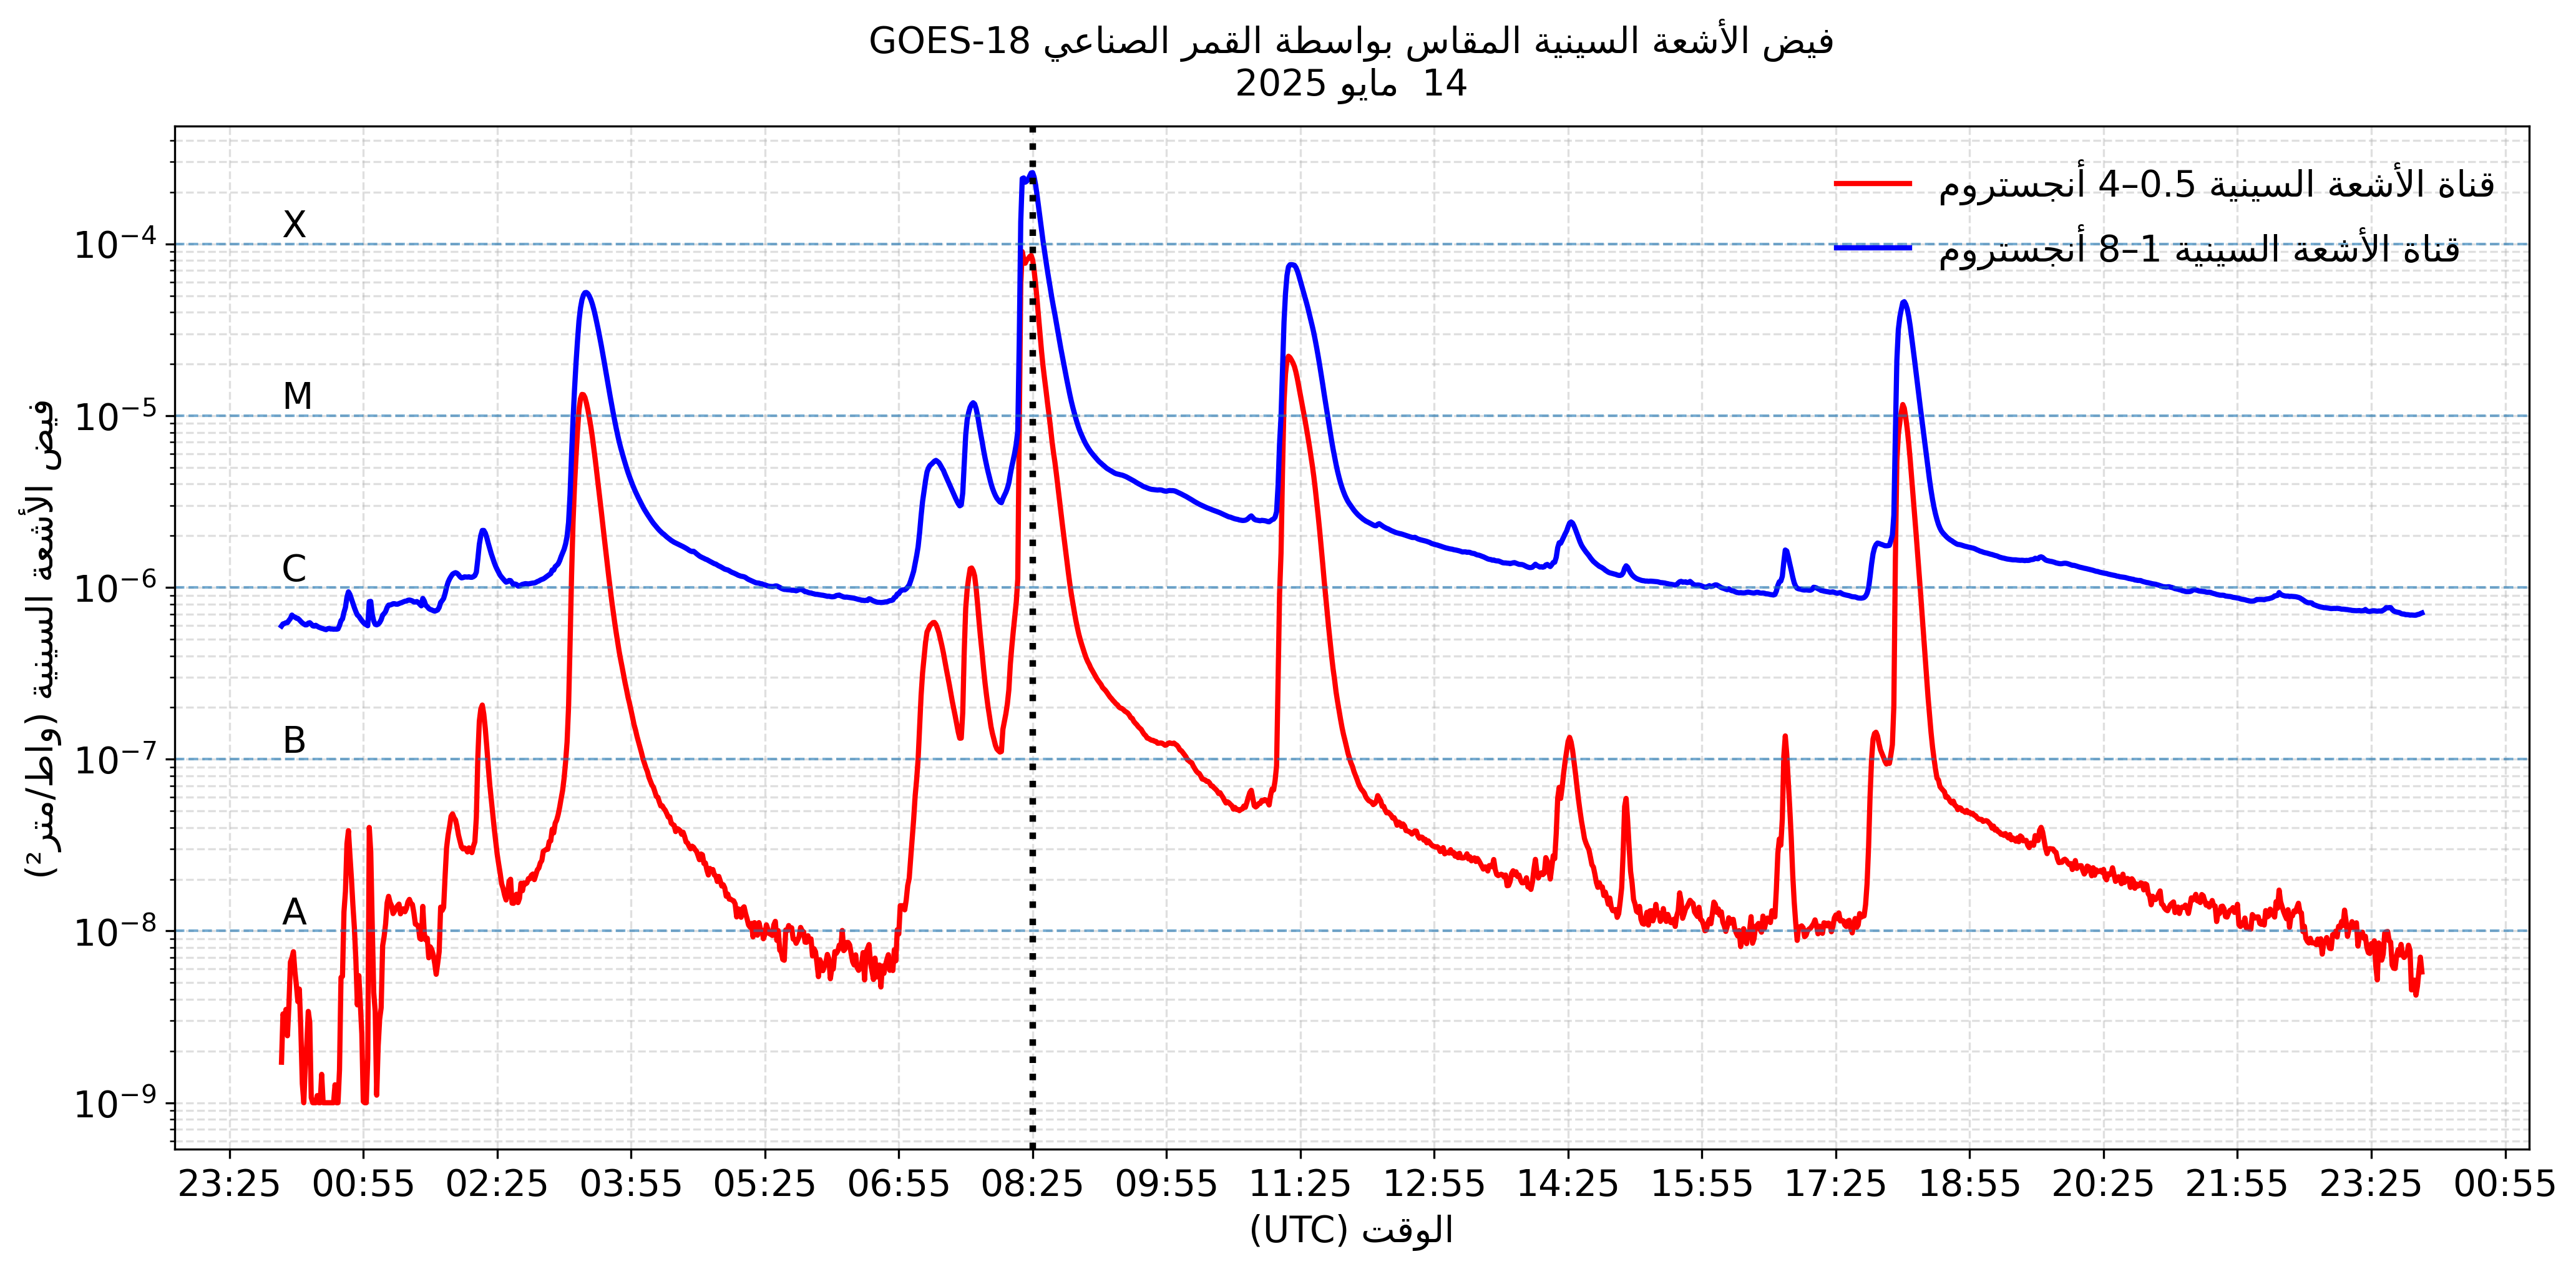

In [12]:

plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 14,
    "axes.labelsize": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
})

plt.figure(figsize=(14,7), dpi=300)  # High resolution


# رسم قنوات الأشعة السينية
plt.plot(
    time, flux_long,
    label=ar("قناة الأشعة السينية 0.5–4 أنجستروم"),
    color="red",
    linewidth=2
)

plt.plot(
    time, flux_short,
    label=ar("قناة الأشعة السينية 1–8 أنجستروم"),
    color="blue",
    linewidth=2
)

plt.yscale("log")


# مستويات تصنيف التوهجات
flare_levels = {
    "A": 1e-8,
    "B": 1e-7,
    "C": 1e-6,
    "M": 1e-5,
    "X": 1e-4
}

for label, level in flare_levels.items():
    plt.axhline(level, linestyle="--", linewidth=1.0, alpha=0.6)
    plt.text(time[0], level * 1.1, label, fontsize=14)


# ذروة التوهج من الفئة X
X_threshold = 1e-4
x_idx = np.where(flux_short >= X_threshold)[0]

if len(x_idx) > 0:
    peak_idx  = x_idx[np.argmax(flux_short[x_idx])]
    peak_time = time[peak_idx]

    plt.axvline(
        peak_time,
        color="black",
        linestyle=":",
        linewidth=2.5
    )



# تنسيق المحور الزمني
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=90))

plt.xlabel(ar("الوقت (UTC)"))
plt.ylabel(ar("فيض الأشعة السينية (واط/متر²)"))


plt.title(
    ar("فيض الأشعة السينية المقاس بواسطة القمر الصناعي GOES-18\n"
       " 14 مايو 2025"),
    pad=12
)

plt.legend(frameon=False)
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()
